In [1]:
# importing libraries and dataset
import pandas as pd
train = pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/train.csv")
test = pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/test.csv")
print(train.head())
print(train.columns)
print(train.shape)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [2]:
# to look summary of numerical fields
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [3]:
# Frequency distribution for non - numeric values
train['Loan_ID'].value_counts()
train.Property_Area.value_counts()


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [4]:
# distribution of numerical variables
print(train.hist(column='ApplicantIncome')) # train['ApplicantIncome].hist(bins=50)
print(train.hist(column='ApplicantIncome',bins=50))

[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001348EA26208>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013490A95860>]]


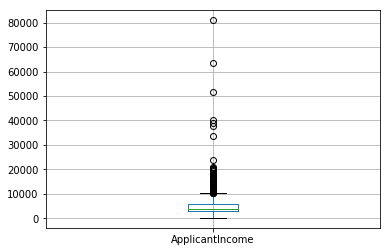

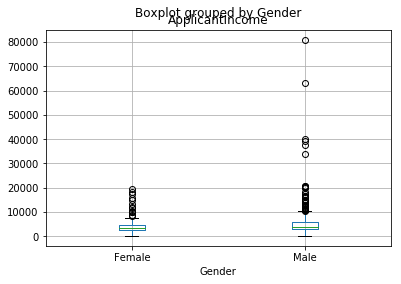

In [5]:
train.boxplot(column='ApplicantIncome')
train.boxplot(column='ApplicantIncome',by='Gender')

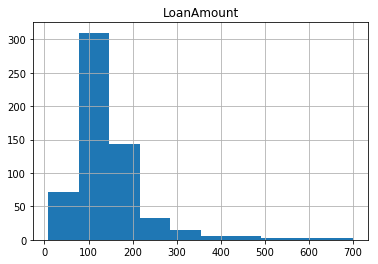

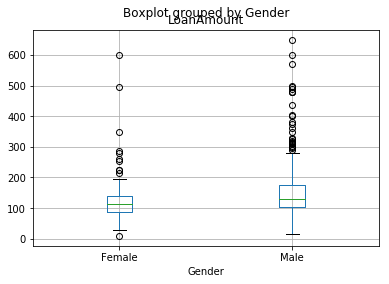

In [6]:
#distribution for Loan Amount
train.hist(column='LoanAmount')
train.boxplot(column='LoanAmount',by='Gender')

In [7]:
# distribution for categorical varibles
twowaytable = pd.crosstab(train['Gender'], train['Loan_Status'], margins=True)
print(twowaytable)

Loan_Status    N    Y  All
Gender                    
Female        37   75  112
Male         150  339  489
All          187  414  601


In [8]:
#convert into percentage
def percentageconvert(ser):
    return (ser/float(ser[-1]))*100

percent = pd.crosstab(train['Gender'], train['Loan_Status'], margins=True).apply(percentageconvert, axis=1)
print(percent)

Loan_Status          N          Y    All
Gender                                  
Female       33.035714  66.964286  100.0
Male         30.674847  69.325153  100.0
All          31.114809  68.885191  100.0


In [9]:
# finding out missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# imputing missing values to Loan Amount
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)
train['LoanAmount'].isnull().sum()

0

In [11]:
# imputing missing values to SelfEmployed(categorical variable)
train['Self_Employed'].fillna('No', inplace=True)
train['Self_Employed'].isnull().sum()

0

In [12]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
train['Gender'].fillna('Male', inplace=True)
train['Gender'].isnull().sum()
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [14]:
train['Married'].fillna('Yes', inplace=True)
train['Married'].isnull().sum()

0

In [15]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(), inplace=True)
train['Loan_Amount_Term'].isnull().sum()

0

In [16]:
train['Credit_History'].fillna(1, inplace=True)
train['Dependents'].value_counts()
train['Dependents'].fillna(0, inplace=True)

In [17]:
# check for all missing values are imputed or not
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
# Treat/Transform Extreme values of Applicant Income and Co Applicant Income
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['Total_Income'].head()

0    5849.0
1    6091.0
2    3000.0
3    4941.0
4    6000.0
Name: Total_Income, dtype: float64

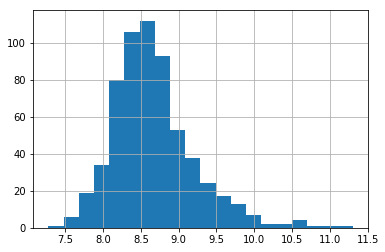

In [19]:
# convert it into log
import numpy as np
train['Total_Income_log'] = np.log(train['Total_Income'])
train['Total_Income_log'].hist(bins=20)

In [20]:
#Entering the phase of building predictive model/Machine Learning model using scikit - learn.
#convert the categorical to numeric because in scikit all inputs must be numeric array.
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
train['Gender'] = number.fit_transform(train['Gender'].astype(str))
print(train['Gender'].value_counts())
train['Married'] = number.fit_transform(train['Married'].astype(str))
print(train['Married'].value_counts())
train['Loan_Status'] =number.fit_transform(train['Loan_Status'].astype(str))
print(train['Loan_Status'].value_counts())
print(train['Education'].value_counts())
train['Education'] = number.fit_transform(train['Education'].astype(str))
print(train['Education'].value_counts())


1    502
0    112
Name: Gender, dtype: int64
1    401
0    213
Name: Married, dtype: int64
1    422
0    192
Name: Loan_Status, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
0    480
1    134
Name: Education, dtype: int64


In [21]:
#selecting right algorithm
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
predictors = ['Credit_History', 'Education', 'Gender']
X_train = train[predictors].values
Y_train = train['Loan_Status'].values
LogReg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
# Need to preprocess the test data set as we did for train data set.
# finding out missing values
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [23]:
test['Gender'].value_counts()
test['Gender'].fillna('Male', inplace=True)
test['Dependents'].fillna(0, inplace=True)
test['Self_Employed'].fillna('No', inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].mean(), inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(), inplace=True)
test['Credit_History'].fillna(1, inplace=True)
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

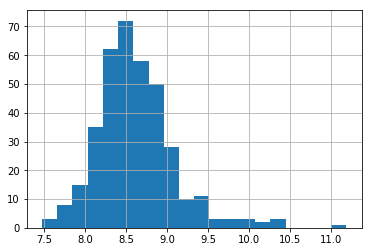

In [24]:
# Treat/Transform Extreme values of Applicant Income and Co Applicant Income
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']
test['Total_Income'].head()
# convert it into log
import numpy as np
test['Total_Income_log'] = np.log(test['Total_Income'])
test['Total_Income_log'].hist(bins=20)

In [25]:
#convert the categorical to numeric because in scikit all inputs must be numeric array.
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
test['Gender'] = number.fit_transform(test['Gender'].astype(str))
print(test['Gender'].value_counts())
test['Married'] = number.fit_transform(test['Married'].astype(str))
print(test['Married'].value_counts())
#test['Loan_Status'] =number.fit_transform(test['Loan_Status'].astype(str))
#print(test['Loan_Status'].value_counts())
print(test['Education'].value_counts())
test['Education'] = number.fit_transform(test['Education'].astype(str))
print(test['Education'].value_counts())

1    297
0     70
Name: Gender, dtype: int64
1    233
0    134
Name: Married, dtype: int64
Graduate        283
Not Graduate     84
Name: Education, dtype: int64
0    283
1     84
Name: Education, dtype: int64


In [26]:
# predicting the test data
x_test = test[predictors].values
prediction = LogReg.predict(x_test)
print(prediction)
#Reverse encoding for predicted outcome
#predicted = number.inverse_transform(prediction)
#print(predicted)
#Store it to test dataset
test['Loan_Status']=prediction
print(type(test.Loan_Status))
#converting it into Y or N using numpy
test['Loan_Status'] = np.where(test.Loan_Status ==1,'Y','N')
print(test.Loan_Status)
#Output file to make submission
test.to_csv("Submission.csv",columns=['Loan_ID','Loan_Status'],index=False)


[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
<class 'pandas.core.series.Series'>
0      Y
1      Y
2      Y
3      Y
4      Y
5      Y
6      Y
7      N
8      Y
9      Y
10     Y
11     Y
12     Y
13     N
14     Y
15     Y
16     Y
17     Y
18     Y
19     Y
20     Y
21     Y
22     Y
23     Y
24 

In [27]:
# Modelling using decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
# predicting the test data
tree_prediction = tree.predict(x_test)
print(tree_prediction)
#Reverse encoding for predicted outcome
#tree_predicted = number.inverse_transform(tree_prediction)
#print(tree_predicted)
#Store it to test dataset
test['Loan_Status'] = tree_prediction
test['Loan_Status'] = np.where(test.Loan_Status == 1,'Y','N')
#Output file to make submission
test.to_csv("Submission1.csv",columns=['Loan_ID','Loan_Status'],index=False)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [32]:
# Modelling using Random Forest
from sklearn.ensemble import RandomForestClassifier
Forest = RandomForestClassifier()
Forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
# predicting the test data
forest_prediction = Forest.predict(x_test)
print(forest_prediction)
#Reverse encoding for predicted outcome
#tree_predicted = number.inverse_transform(tree_prediction)
#print(tree_predicted)
#Store it to test dataset
test['Loan_Status'] = forest_prediction
test['Loan_Status'] = np.where(test.Loan_Status == 1,'Y','N')
#Output file to make submission
test.to_csv("Submission2.csv",columns=['Loan_ID','Loan_Status'],index=False)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [36]:
predictors=['ApplicantIncome', 'CoapplicantIncome', 'Credit_History','Dependents', 'Education', 'Gender', 'LoanAmount',
            'Loan_Amount_Term', 'Married', 'Property_Area', 'Self_Employed', 'TotalIncome','Log_TotalIncome']
feat_imp = pd.Series(Forest.feature_impotances_, index=predictors).sort_values(ascending=False)
print(feat_imp)

AttributeError: 'RandomForestClassifier' object has no attribute 'feature_impotances_'